In [1]:
%%time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/parquet-files-amexdefault-prediction/test_data.parquet
/kaggle/input/parquet-files-amexdefault-prediction/train_data.ftr
/kaggle/input/parquet-files-amexdefault-prediction/train_data.parquet
/kaggle/input/parquet-files-amexdefault-prediction/test_data.ftr
CPU times: user 603 µs, sys: 70 µs, total: 673 µs
Wall time: 6.51 ms


In [2]:
%%time
import datetime # ...

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10.5 µs


---

In [3]:
%%time
import warnings
warnings.filterwarnings('ignore')

CPU times: user 26 µs, sys: 3 µs, total: 29 µs
Wall time: 31 µs


In [4]:
%%time
# Notebook Configuration

# Amount of data to load into the Model
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize
NROWS = 50
NCOLS = 15
# Main data location path
BASE_PATH = '...'

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [5]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 98 µs, sys: 0 ns, total: 98 µs
Wall time: 103 µs


---

In [6]:
%%time
# Load the CSV information into a Pandas DataFrame...
trn_data = pd.read_feather('../input/parquet-files-amexdefault-prediction/train_data.ftr')
trn_lbls = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv').set_index('customer_ID')

tst_data = pd.read_feather('../input/parquet-files-amexdefault-prediction/test_data.ftr')

CPU times: user 26.5 s, sys: 11.8 s, total: 38.3 s
Wall time: 1min 7s


In [7]:
%%time
sub = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')

CPU times: user 912 ms, sys: 794 ms, total: 1.71 s
Wall time: 2 s


---

# Exploring the Dataset - EDA

In [8]:
%%time
# Explore the shape of the DataFrame...
trn_data.shape

CPU times: user 27 µs, sys: 11 µs, total: 38 µs
Wall time: 42.4 µs


(5531451, 190)

In [9]:
%%time
# Display simple information of the variables in the dataset...
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), float16(176), int64(1), object(2)
memory usage: 2.0+ GB
CPU times: user 18 ms, sys: 400 µs, total: 18.4 ms
Wall time: 24 ms


In [10]:
%%time
# Display the first few rows of the DataFrame...
trn_data.head()

CPU times: user 178 µs, sys: 72 µs, total: 250 µs
Wall time: 256 µs


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.93848,0.00173,0.00873,1.00684,0.00922,...,0.00243,0.00371,0.00382,NaN,0.00057,0.00061,0.00267
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.93652,0.00578,0.00492,1.00098,0.00615,...,0.00396,0.00317,0.00503,NaN,0.00957,0.00549,0.00922
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.95410,0.09149,0.02165,1.00977,0.00682,...,0.00327,0.00733,0.00043,NaN,0.00343,0.00698,0.00260
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.96045,0.00245,0.01369,1.00293,0.00137,...,0.00612,0.00452,0.00320,NaN,0.00842,0.00653,0.00960
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.94727,0.00248,0.01519,1.00098,0.00761,...,0.00367,0.00494,0.00889,NaN,0.00167,0.00813,0.00983


In [11]:
%%time
# Display the Min Date
trn_data['S_2'].min()

CPU times: user 295 ms, sys: 2.46 ms, total: 298 ms
Wall time: 297 ms


'2017-03-01'

In [12]:
%%time
# Display the Max Date
trn_data['S_2'].max()

CPU times: user 284 ms, sys: 1.18 ms, total: 285 ms
Wall time: 284 ms


'2018-03-31'

In [13]:
%%time
# Generate a simple statistical summary of the DataFrame, Only Numerical
trn_data.describe()

CPU times: user 2min 2s, sys: 2.45 s, total: 2min 4s
Wall time: 2min 5s


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,"5,485,466.00000","5,531,451.00000","5,531,451.00000","5,529,435.00000","5,531,451.00000","4,510,907.00000","5,529,435.00000",...,"5,429,903.00000","5,490,819.00000","5,429,903.00000","944,408.00000","5,429,903.00000","5,490,724.00000","5,429,903.00000"
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
min,-0.45898,0.00000,-7.58984,0.00000,0.00000,-0.62695,0.00000,...,0.00000,0.00000,0.00000,-0.01454,0.00000,0.00000,0.00000
25%,0.48022,0.00453,0.00887,0.10535,0.00290,0.12732,0.00287,...,0.00303,0.00256,0.00303,0.19934,0.00303,0.00275,0.00303
50%,0.69434,0.00906,0.03134,0.81445,0.00578,0.16394,0.00574,...,0.00605,0.00511,0.00605,0.38208,0.00605,0.00551,0.00605
75%,0.86475,0.23669,0.12585,1.00195,0.00866,0.25806,0.00861,...,0.00908,0.00766,0.00908,0.55908,0.00908,0.00826,0.00908
max,1.00977,5.39062,1.32422,1.00977,3.25586,5.48438,8.99219,...,1.00977,1.00977,1.33984,2.22852,1.00977,1.34375,4.82812


In [14]:
%%time
# Calculates the total number of missing values
trn_data.isnull().sum().sum()

CPU times: user 3.49 s, sys: 200 ms, total: 3.69 s
Wall time: 3.71 s


160858968

In [15]:
%%time
# Display the number of missing values by variable
trn_data.isnull().sum()

CPU times: user 3.54 s, sys: 186 ms, total: 3.72 s
Wall time: 3.72 s


customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_141           101548
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
Length: 190, dtype: int64

In [16]:
%%time
# Display the number of unique values for each variable
trn_data.nunique()

CPU times: user 13.4 s, sys: 1.17 s, total: 14.6 s
Wall time: 14.6 s


customer_ID    458913
S_2               396
P_2             17205
D_39            11242
B_1             22627
                ...  
D_141            9055
D_142           14075
D_143            8491
D_144           15412
D_145            9228
Length: 190, dtype: int64

In [17]:
%%time
# Display the number of unique values for each variable, sorted by quantity
trn_data.nunique().sort_values(ascending = True)

CPU times: user 13 s, sys: 1.13 s, total: 14.2 s
Wall time: 14.2 s


D_87                1
B_31                2
D_114               2
D_116               2
D_120               2
                ...  
B_15            23154
B_37            23906
B_25            24710
B_14            25845
customer_ID    458913
Length: 190, dtype: int64

---

# Understanding the Target Variable

In [18]:
%%time
# Explore the shape of the DataFrame
trn_lbls.shape

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 22.4 µs


(458913, 1)

In [19]:
%%time
# Display simple information of the variables in the dataset
trn_lbls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   target  458913 non-null  int64
dtypes: int64(1)
memory usage: 7.0+ MB
CPU times: user 8.13 ms, sys: 0 ns, total: 8.13 ms
Wall time: 7.8 ms


In [20]:
%%time
# Check how well balanced is the dataset
trn_lbls['target'].value_counts()

CPU times: user 4.59 ms, sys: 58 µs, total: 4.65 ms
Wall time: 4.35 ms


0    340085
1    118828
Name: target, dtype: int64

In [21]:
%%time
# Check some statistics on the target variable
trn_lbls['target'].describe()

CPU times: user 12.1 ms, sys: 1.01 ms, total: 13.1 ms
Wall time: 12.7 ms


count   458,913.00000
mean          0.25893
std           0.43805
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: target, dtype: float64

---

# Structuring Data for the Model (Aggreations and More)

## Training Dataset

In [23]:
%%time
# Calculates the amount of information by costumer or records available
trn_num_statements = trn_data.groupby('customer_ID').size().sort_index()

CPU times: user 1.1 s, sys: 87 ms, total: 1.19 s
Wall time: 1.21 s


In [24]:
%%time
# Review some of the information created
trn_num_statements

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    13
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    13
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    13
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    13
                                                                    ..
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7    13
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    13
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6    13
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461    13
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    13
Length: 458913, dtype: int64

In [25]:
%%time
# Create a new dataset based on aggregated information
trn_agg_data = (trn_data
                .groupby('customer_ID')
                .tail(1)
                .set_index('customer_ID', drop=True)
                .sort_index()
                .drop(['S_2'], axis='columns'))

# Merge the labels from the labels dataframe
trn_agg_data['target'] = trn_lbls.target
trn_agg_data['num_statements'] = trn_num_statements

trn_agg_data.reset_index(inplace = True, drop = True) # forget the customer_IDs

CPU times: user 1.97 s, sys: 618 ms, total: 2.58 s
Wall time: 2.58 s


In [26]:
%%time
trn_agg_data.head()

CPU times: user 300 µs, sys: 0 ns, total: 300 µs
Wall time: 309 µs


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_141,D_142,D_143,D_144,D_145,target,num_statements
0,0.93457,0.00912,0.00938,1.00781,0.00610,0.13501,0.00160,...,0.00508,NaN,0.00581,0.00297,0.00853,0,13
1,0.88037,0.17810,0.03470,1.00391,0.00691,0.16553,0.00555,...,0.00787,NaN,0.00328,0.00317,0.00851,0,13
2,0.88086,0.00970,0.00428,0.81250,0.00645,NaN,0.00380,...,0.00096,NaN,0.00220,0.00083,0.00344,0,13
3,0.62158,0.00108,0.01257,1.00586,0.00783,0.28784,0.00453,...,0.00190,NaN,0.00819,0.00556,0.00298,0,13
4,0.87207,0.00557,0.00768,0.81592,0.00125,NaN,0.00023,...,0.00576,NaN,0.00816,0.00694,0.00090,0,13


---

## Test Dataset

In [27]:
%%time
# Calculates the amount of information by costumer or records available
tst_num_statements = tst_data.groupby('customer_ID').size().sort_index()

CPU times: user 2.1 s, sys: 167 ms, total: 2.27 s
Wall time: 2.27 s


In [28]:
%%time
# Create a new dataset based on aggregated information
tst_agg_data = (tst_data
                .groupby('customer_ID')
                .tail(1)
                .set_index('customer_ID', drop=True)
                .sort_index()
                .drop(['S_2'], axis='columns'))

# Merge the labels from the labels dataframe
tst_agg_data['num_statements'] = tst_num_statements

tst_agg_data.reset_index(inplace = True, drop = True) # forget the customer_IDs

CPU times: user 4.14 s, sys: 1.24 s, total: 5.38 s
Wall time: 5.4 s


In [29]:
%%time
tst_agg_data.head()

CPU times: user 230 µs, sys: 0 ns, total: 230 µs
Wall time: 236 µs


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_140,D_141,D_142,D_143,D_144,D_145,num_statements
0,0.56885,0.12140,0.01078,1.00977,0.00692,0.14941,0.00040,...,0.00125,0.00654,NaN,0.00916,0.00369,0.00322,9
1,0.84131,0.12646,0.01656,1.00879,0.00971,0.11218,0.00619,...,0.00087,0.00912,NaN,0.00220,0.00025,0.00778,13
2,0.69775,0.00272,0.00148,0.81006,0.00262,0.16614,0.00489,...,0.00890,0.89600,0.15015,1.00977,0.45776,0.09204,13
3,0.51318,0.32471,0.14954,0.20569,0.00228,0.18115,0.00581,...,0.00375,0.91992,0.25537,1.00781,0.50098,0.18298,13
4,0.25439,0.76807,0.56348,0.03802,0.50293,0.16833,0.00948,...,0.00114,0.00953,NaN,0.00941,0.00156,0.00052,13


---

# Label / One-Hot Encoding the Categorical Variables

## One Hot Encoding Configuration

In [30]:
%%time
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder, OrdinalEncoder

CPU times: user 493 ms, sys: 104 ms, total: 597 ms
Wall time: 905 ms


In [31]:
%%time
# One-hot Encoding Configuration
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

#trn_agg_data[cat_features] = trn_agg_data[cat_features].astype(object)
trn_not_cat_features = [f for f in trn_agg_data.columns if f not in cat_features]
tst_not_cat_features = [f for f in tst_agg_data.columns if f not in cat_features]

CPU times: user 188 µs, sys: 20 µs, total: 208 µs
Wall time: 212 µs


In [32]:
%%time
trn_agg_data[cat_features].head()

CPU times: user 6.23 ms, sys: 127 µs, total: 6.35 ms
Wall time: 6.42 ms


,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.00000,2.00000,1.00000,0.00000,4.00000,0.00000,1.00000,CR,O,NaN,6.00000
1,0.00000,2.00000,1.00000,0.00000,-1.00000,0.00000,1.00000,CO,O,NaN,6.00000
2,0.00000,1.00000,1.00000,0.00000,-1.00000,0.00000,1.00000,CO,R,NaN,6.00000
3,0.00000,2.00000,1.00000,0.00000,6.00000,0.00000,1.00000,CO,O,NaN,3.00000
4,0.00000,1.00000,1.00000,0.00000,4.00000,0.00000,1.00000,CO,O,1.00000,6.00000


In [33]:
%%time
#encoder = OneHotEncoder(drop = 'first', sparse = False, dtype = np.float32, handle_unknown = 'ignore')
encoder = OrdinalEncoder()
trn_encoded_features = encoder.fit_transform(trn_agg_data[cat_features])

CPU times: user 694 ms, sys: 28.5 ms, total: 723 ms
Wall time: 730 ms


## Train Dataset One Hot Encoding

In [34]:
%%time
# One-hot Encoding
trn_encoded_features = pd.DataFrame(trn_encoded_features)

CPU times: user 1.35 ms, sys: 37 µs, total: 1.39 ms
Wall time: 1.4 ms


In [35]:
%%time
trn_agg_data = pd.concat([trn_agg_data[trn_not_cat_features], trn_encoded_features], axis = 1)
trn_agg_data.head(5)

CPU times: user 250 ms, sys: 332 ms, total: 582 ms
Wall time: 582 ms


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.93457,0.00912,0.00938,1.00781,0.00610,0.13501,0.00160,...,4.00000,0.00000,1.00000,2.00000,0.00000,NaN,5.00000
1,0.88037,0.17810,0.03470,1.00391,0.00691,0.16553,0.00555,...,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,5.00000
2,0.88086,0.00970,0.00428,0.81250,0.00645,NaN,0.00380,...,0.00000,0.00000,1.00000,1.00000,1.00000,NaN,5.00000
3,0.62158,0.00108,0.01257,1.00586,0.00783,0.28784,0.00453,...,6.00000,0.00000,1.00000,1.00000,0.00000,NaN,2.00000
4,0.87207,0.00557,0.00768,0.81592,0.00125,NaN,0.00023,...,4.00000,0.00000,1.00000,1.00000,0.00000,0.00000,5.00000


---

## Test Dataset One-Hot Encoding

In [36]:
%%time
tst_agg_data[cat_features].head()

CPU times: user 6.53 ms, sys: 7.95 ms, total: 14.5 ms
Wall time: 12.8 ms


,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.00000,2.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,CR,U,NaN,6.00000
1,0.00000,2.00000,1.00000,0.00000,3.00000,0.00000,1.00000,CO,O,NaN,6.00000
2,0.00000,2.00000,0.00000,0.00000,3.00000,0.00000,0.00000,CR,U,1.00000,4.00000
3,0.00000,3.00000,0.00000,0.00000,4.00000,0.00000,1.00000,CL,R,NaN,5.00000
4,1.00000,6.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,CO,R,NaN,5.00000


In [37]:
%%time
# One-hot Encoding
tst_encoded_features = encoder.transform(tst_agg_data[cat_features])
tst_encoded_features = pd.DataFrame(tst_encoded_features)

CPU times: user 971 ms, sys: 77 ms, total: 1.05 s
Wall time: 1.05 s


In [38]:
%%time
tst_agg_data = pd.concat([tst_agg_data[tst_not_cat_features], tst_encoded_features], axis = 1)
tst_agg_data.head()

CPU times: user 525 ms, sys: 651 ms, total: 1.18 s
Wall time: 1.17 s


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.56885,0.12140,0.01078,1.00977,0.00692,0.14941,0.00040,...,0.00000,1.00000,0.00000,2.00000,2.00000,NaN,5.00000
1,0.84131,0.12646,0.01656,1.00879,0.00971,0.11218,0.00619,...,3.00000,0.00000,1.00000,1.00000,0.00000,NaN,5.00000
2,0.69775,0.00272,0.00148,0.81006,0.00262,0.16614,0.00489,...,3.00000,0.00000,0.00000,2.00000,2.00000,0.00000,3.00000
3,0.51318,0.32471,0.14954,0.20569,0.00228,0.18115,0.00581,...,4.00000,0.00000,1.00000,0.00000,1.00000,NaN,4.00000
4,0.25439,0.76807,0.56348,0.03802,0.50293,0.16833,0.00948,...,0.00000,1.00000,0.00000,1.00000,1.00000,NaN,4.00000


---

# Pre-Processing the Data, Fill NaNs for model functionality

In [39]:
%%time
# Impute missing values
trn_agg_data.fillna(value = 0, inplace = True)
tst_agg_data.fillna(value = 0, inplace = True)

CPU times: user 1.02 s, sys: 225 ms, total: 1.24 s
Wall time: 1.24 s


---

# Feature Selection for Baseline Model

In [40]:
%%time
features = [f for f in trn_agg_data.columns if f != 'target' and f != 'customer_ID']

CPU times: user 56 µs, sys: 6 µs, total: 62 µs
Wall time: 65.1 µs


---

# 10.0 NN Development

In [41]:
%%time
import gc
del trn_data, tst_data
gc.collect()

CPU times: user 158 ms, sys: 14.1 ms, total: 172 ms
Wall time: 171 ms


46

## Loading Specific Model Libraries

In [42]:
%%time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, InputLayer, Add, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.utils import plot_model
from sklearn.metrics import log_loss

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import random

CPU times: user 1.79 s, sys: 889 ms, total: 2.68 s
Wall time: 5.54 s


---

## Amex Metric, Function

In [43]:
%%time

def amex_metric(y_true, y_pred, return_components=False) -> float:
    """Amex metric for ndarrays"""
    
    def top_four_percent_captured(df) -> float:
        """Corresponds to the recall for a threshold of 4 %"""
        
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
    
    
    def weighted_gini(df) -> float:
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    
    def normalized_weighted_gini(df) -> float:
        """Corresponds to 2 * AUC - 1"""
        
        df2 = pd.DataFrame({'target': df.target, 'prediction': df.target})
        df2.sort_values('prediction', ascending=False, inplace=True)
        return weighted_gini(df) / weighted_gini(df2)

    
    df = pd.DataFrame({'target': y_true.ravel(), 'prediction': y_pred.ravel()})
    df.sort_values('prediction', ascending=False, inplace=True)
    g = normalized_weighted_gini(df)
    d = top_four_percent_captured(df)

    if return_components: return g, d, 0.5 * (g + d)
    return 0.5 * (g + d)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


---

## Defining the NN Model Architecture

## Simple NN

In [45]:
%%time
def nn_model():
    '''
    '''
    regularization = 4e-4
    activation_func = 'swish'
    inputs = Input(shape = (len(features)))
    
    x = Dense(256, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(inputs)
    
    x = BatchNormalization()(x)
    
    x = Dense(64, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(x)
    
    x = BatchNormalization()(x)
    
    x = Dense(64, 
          #use_bias  = True, 
          kernel_regularizer = tf.keras.regularizers.l2(regularization), 
          activation = activation_func)(x)
    
    x = BatchNormalization()(x)

    x = Dense(32, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(x)
    
    x = BatchNormalization()(x)

    x = Dense(1, 
              #use_bias  = True, 
              #kernel_regularizer = tf.keras.regularizers.l2(regularization),
              activation = 'sigmoid')(x)
    
    model = Model(inputs, x)
    
    return model

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


---

## Concatenated NN

In [46]:
%%time
def nn_model():
    regularization = 4e-4
    activation_func = 'swish'
    inputs = Input(shape = (len(features)))

    x0 = Dense(256,
               kernel_regularizer = tf.keras.regularizers.l2(regularization), 
               activation = activation_func)(inputs)
    x1 = Dense(128,
               kernel_regularizer = tf.keras.regularizers.l2(regularization),
               activation = activation_func)(x0)
    x1 = Dense(64,
               kernel_regularizer = tf.keras.regularizers.l2(regularization),
               activation = activation_func)(x1)
    x1 = Dense(32,
           kernel_regularizer = tf.keras.regularizers.l2(regularization),
           activation = activation_func)(x1)
    
    x1 = Concatenate()([x1, x0])
    x1 = Dropout(0.1)(x1)
    
    x1 = Dense(16, kernel_regularizer=tf.keras.regularizers.l2(regularization),activation=activation_func,)(x1)
    
    x1 = Dense(1, 
              #kernel_regularizer=tf.keras.regularizers.l2(regularization),
              activation='sigmoid')(x1)
    
    model = Model(inputs, x1)
    
    return model
    

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


---

## Visualizing the Model Structure

In [47]:
%%time
architecture = nn_model()
architecture.summary()

2023-01-16 14:05:50.549247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 189)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          48640       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          32896       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

2023-01-16 14:05:50.658298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 14:05:50.659069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 14:05:50.660259: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 14:05:50.660584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

CPU times: user 60.8 ms, sys: 113 ms, total: 174 ms
Wall time: 1.21 s


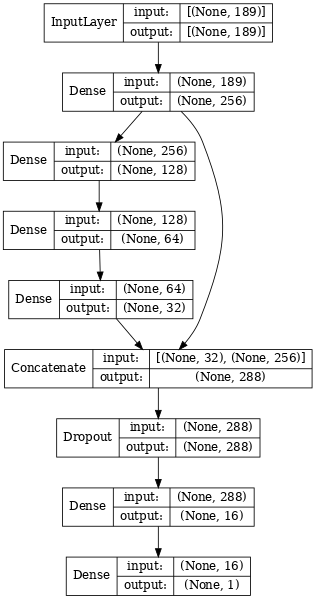

In [48]:
%%time
plot_model(nn_model(), show_layer_names = False, show_shapes = True, dpi = 60)

---

## Defining Model Training Parameters

In [49]:
%%time
# Defining model parameters...
BATCH_SIZE         = 2048
EPOCHS             = 192 
EPOCHS_COSINEDECAY = 192 
DIAGRAMS           = True
USE_PLATEAU        = False
INFERENCE          = False
VERBOSE            = 0 
TARGET             = 'target'

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


---

## Defining the Model Training Configuration

In [50]:
 %%time
# Defining model training function
def fit_model(X_train, y_train, X_val, y_val, run = 0):
    '''
    '''
    lr_start = 0.01
    start_time = datetime.datetime.now()
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    epochs = EPOCHS    
    lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, patience = 4, verbose = VERBOSE)
    es = EarlyStopping(monitor = 'val_loss',patience = 12, verbose = 1, mode = 'min', restore_best_weights = True)
    tm = tf.keras.callbacks.TerminateOnNaN()
    callbacks = [lr, es, tm]
    
    # Cosine Learning Rate Decay
    if USE_PLATEAU == False:
        epochs = EPOCHS_COSINEDECAY
        lr_end = 0.0002

        def cosine_decay(epoch):
            if epochs > 1:
                w = (1 + math.cos(epoch / (epochs - 1) * math.pi)) / 2
            else:
                w = 1
            return w * lr_start + (1 - w) * lr_end
        
        lr = LearningRateScheduler(cosine_decay, verbose = 0)
        callbacks = [lr, tm]
    
    # Model Initialization...
    model = nn_model()
    optimizer_func = tf.keras.optimizers.Adam(learning_rate = lr_start)
    loss_func = tf.keras.losses.BinaryCrossentropy()
    model.compile(optimizer = optimizer_func, loss = loss_func)
    
    
    X_val = scaler.transform(X_val)
    validation_data = (X_val, y_val)
    
    history = model.fit(X_train, 
                        y_train, 
                        validation_data = validation_data, 
                        epochs          = epochs,
                        verbose         = VERBOSE,
                        batch_size      = BATCH_SIZE,
                        shuffle         = True,
                        callbacks       = callbacks
                       )
    
    history_list.append(history.history)
    
    print(f'Training Loss: {history_list[-1]["loss"][-1]:.5f}, Validation Loss: {history_list[-1]["val_loss"][-1]:.5f}')
    callbacks, es, lr, tm, history = None, None, None, None, None
    
    
    y_val_pred = model.predict(X_val, batch_size = BATCH_SIZE, verbose = VERBOSE).ravel()
    amex_score = amex_metric(y_val.values, y_val_pred, return_components = False)
    
    print(f'Fold {run}.{fold} | {str(datetime.datetime.now() - start_time)[-12:-7]}'
          f'| Amex Score: {amex_score:.5f}')
    
    print('')
    
    score_list.append(amex_score)
    
    tst_data_scaled = scaler.transform(tst_agg_data[features])
    tst_pred = model.predict(tst_data_scaled)
    predictions.append(tst_pred)
    
    return model

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs


---

## Creating a Model Training Loop and Cross Validating in 5 Folds

In [52]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score, roc_curve
import math

# Create empty lists to store NN information...
history_list = []
score_list   = []
predictions  = []

# Define kfolds for training purposes...

kf = KFold(n_splits = 5)

for fold, (trn_idx, val_idx) in enumerate(kf.split(trn_agg_data)):
    X_train, X_val = trn_agg_data.iloc[trn_idx][features], trn_agg_data.iloc[val_idx][features]
    y_train, y_val = trn_agg_data.iloc[trn_idx][TARGET], trn_agg_data.iloc[val_idx][TARGET]
    
    fit_model(X_train, y_train, X_val, y_val)
    
print(f'OOF AUC: {np.mean(score_list):.5f}')

2023-01-16 14:05:59.645587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Training Loss: 0.22557, Validation Loss: 0.22963
Fold 0.0 | 02:41| Amex Score: 0.78236

Training Loss: 0.22550, Validation Loss: 0.22978
Fold 0.1 | 02:37| Amex Score: 0.78053

Training Loss: 0.22623, Validation Loss: 0.22740
Fold 0.2 | 02:36| Amex Score: 0.78152

Training Loss: 0.22650, Validation Loss: 0.22582
Fold 0.3 | 02:36| Amex Score: 0.78385

Training Loss: 0.22691, Validation Loss: 0.22560
Fold 0.4 | 02:35| Amex Score: 0.78634

OOF AUC: 0.78292
CPU times: user 19min 14s, sys: 1min 29s, total: 20min 44s
Wall time: 16min 34s


---

# Model Prediction and Submissions

In [53]:
%%time
sub.head()

CPU times: user 161 µs, sys: 13 µs, total: 174 µs
Wall time: 182 µs


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0


In [54]:
%%time
sub['prediction'] = np.array(predictions).mean(axis = 0)

CPU times: user 8.25 ms, sys: 0 ns, total: 8.25 ms
Wall time: 8.31 ms


In [55]:
%%time
sub.to_csv('my_submission.csv', index = False)

CPU times: user 1.95 s, sys: 105 ms, total: 2.06 s
Wall time: 2.06 s


In [56]:
%%time
sub.head()

CPU times: user 84 µs, sys: 7 µs, total: 91 µs
Wall time: 94.2 µs


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.02330
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.00222
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.03493
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.43281
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.90705


---